# Section 1: Getting Started With Matplotlib

We will begin by familiarizing ourselves with Matplotlib. Moving beyond the default options, we will explore how to customize various aspects of our visualizations. By the end of this section, you will be able to generate plots using the Matplotlib API directly, as well as customize the plots that libraries like pandas and Seaborn create for you.

<div style="text-align: center;">
    <img width="400" src="https://images.unsplash.com/photo-1484557985045-edf25e08da73?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1973&q=80" alt="Sheep looking inquisitively.">
    <div><small><em>Baaaaaack to basics.</em></small></div>
</div>

## Learning Path

1. **Why start with Matplotlib?**
2. Matplotlib basics
3. Plotting with Matplotlib

## Why start with Matplotlib?

There are many libraries for creating data visualizations in Python (even more if you include those that build on top of them). In this section, we will learn about Matplotlib's role in the Python data visualization ecosystem before diving into the library itself.

<figure>
  <blockquote cite="https://matplotlib.org/stable/index.html" style="border-left: none; box-shadow: none;">
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. &#91;It&#93; makes easy things easy and hard things possible.
  </blockquote>
  <figcaption style="text-align: right">&ndash; <a href="https://matplotlib.org/stable/index.html" target="_blank" rel="noopener noreferrer">Matplotlib documentation</a></figcaption>
</figure>

We will start by working with the `stackoverflow.zip` dataset, which contains the title and tags for all StackOverflow questions tagged with a select few Python libraries since StackOverflow's inception (Sept. 2008) through Sept. 12, 2021. The data comes from the [StackOverflow API](https://api.stackexchange.com/docs/search) – more information can be found in [this](../data/collection/stackoverflow.ipynb) notebook. Here, we are aggregating the data monthly to get the total number of questions per library per month:

In [1]:
import pandas as pd

stackoverflow_monthly = pd.read_csv(
    '../data/stackoverflow.zip', parse_dates=True, index_col='creation_date'
).loc[:'2021-08','pandas':'bokeh'].resample('1M').sum()
stackoverflow_monthly.sample(5, random_state=1)

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2018-06-30,2690,612,931,75,12,0,9,0,10,9,0,82
2014-12-31,417,280,420,17,1,0,0,0,0,0,0,20
2012-12-31,124,159,209,0,0,0,0,0,0,0,0,0
2011-04-30,2,58,101,0,0,0,0,0,0,0,0,0
2011-08-31,0,74,124,0,0,0,0,0,0,0,0,0


*Source: Stack Exchange Network*

Those familiar with pandas have likely used the `plot()` method to generate visualizations. Here, we plot monthly Matplotlib questions over time:

<AxesSubplot:title={'center':'Matplotlib Questions per Month\n(since the creation of StackOverflow)'}, xlabel='creation date', ylabel='total questions'>

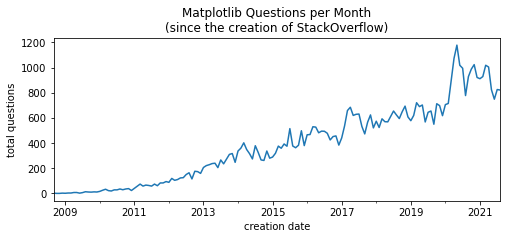

In [2]:
%matplotlib inline
stackoverflow_monthly.matplotlib.plot(
    figsize=(8, 3), xlabel='creation date', ylabel='total questions', 
    title='Matplotlib Questions per Month\n(since the creation of StackOverflow)',
)

*Tip: `%matplotlib inline` is an IPython magic command for embedding inline Matplotlib images in IPython and Jupyter. Curious how it works? Check out the source code [here](https://github.com/ipython/matplotlib-inline).*

Notice that this returns a Matplotlib `Axes` object since pandas is using Matplotlib as a plotting backend. This means that pandas takes care of a lot of the legwork for us &ndash; some examples include the following:

- Creating the figure: [source code](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L373-L392)
- Calling the `Axes.plot()` method: [source code](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L759-L760)
- Adding titles/labels: [source code](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L576-L591)

While pandas can do a lot of the work for us, there are benefits to understanding how to work with Matplotlib directly.

#### Flexibility

We can use other data structures (such as NumPy arrays) without the overhead of converting to a pandas data structure just to plot.

#### Customization

Even if we use pandas to make the initial plot, we can use Matplotlib commands on the `Axes` object that is returned to tweak other parts of the visualization. This is also the case for any library that uses Matplotlib as its plotting backend &ndash; examples of which include the following:
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/): geospatial data processing to produce map visualizations
- [ggplot](https://github.com/yhat/ggplot): Python version of the popular `ggplot2` R package
- [holoviews](http://holoviews.org/): interactive visualizations with minimal code
- [seaborn](https://seaborn.pydata.org/): high-level interface for creating statistical visualizations with Matplotlib
- [yellowbrick](https://www.scikit-yb.org/): extension of Scikit-Learn for creating visualizations to analyze machine learning performance

*Note: Matplotlib maintains a list of such libraries [here](https://matplotlib.org/stable/thirdpartypackages/index.html). We will cover holoviews later in this workshop, and examples with Seaborn can be found in [this](https://github.com/stefmolin/pandas-workshop) workshop.*

#### Extensibility

You can also build on top of Matplotlib for personal/work libraries. This might mean defining custom plot themes or functionality to create commonly-used visualizations.

If you want to contribute to open-source data visualization libraries (like the aforementioned), knowledge of Matplotlib will come in handy. An example is the addition of the `refline()` method in the Seaborn library. This method makes it possible to draw horizontal/vertical reference lines on all subplots at once. The Matplotlib methods `axhline()` and `axvline()` are the basis of [this contribution](https://github.com/mwaskom/seaborn/commit/a626c0ae29b8c777b8e1342948e1611b984bf27b):

<div style="text-align: center;">
    <img width="400" src="https://pbs.twimg.com/media/FBSw8BPX0AAa3wn?format=jpg&name=medium" alt="Seaborn refline() example">
    <div><small><em><a href="https://twitter.com/chris1610/status/1446976863365124098">Source</a></em></small></div>
</div>

## Learning Path

1. Why start with Matplotlib?
2. **Matplotlib basics**
3. Plotting with Matplotlib

## Matplotlib basics

In this workshop, we will explore the static, animated, and interactive functionality to gain a breadth of knowledge of the library. While we won't go too in depth, additional resources will be provided throughout. Now, let's get started with the basics.

<div style="text-align: center;">
<img width="400" src="https://images.unsplash.com/photo-1602027438676-ad64751bdbc1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2662&q=80" alt="Herd mentality: flock of Sheep Southland New Zealand">
</div>

The `Figure` object is the container for all components of our visualization. It contains one or more `Axes` objects, which can be thought of as the (sub)plots, as well as other [*Artists*](https://matplotlib.org/stable/tutorials/intermediate/artists.html), which draw on the plot canvas (x-axis, y-axis, legend, lines, etc.). The following image from the Matplotlib documentation illustrates the different components of a figure:

<div style="text-align: center;">
    <img width="400" src="https://matplotlib.org/stable/_images/anatomy.png" alt="Matplotlib figure anatomy" style="margin-top: -15px;">
    <div><small><em><a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure">Source</a></em></small></div>
</div>

There are two ways we can build visualizations with Matplotlib:
1. **Functional**: call functions provided by the `matplotlib.pyplot` module
2. **Object-oriented**: call methods on `Figure` and `Axes` objects

While the object-oriented (OO) approach is recommended for non-interactive use (i.e., not in a Jupyter Notebook), either approach is valid &ndash; you should, however, try to avoid mixing them. Note that different use cases lend themselves to different approaches, so we will explore examples of both.

#### Functional approach

Text(0.5, 1.0, 'Matplotlib Questions per Month\n(since the creation of StackOverflow)')

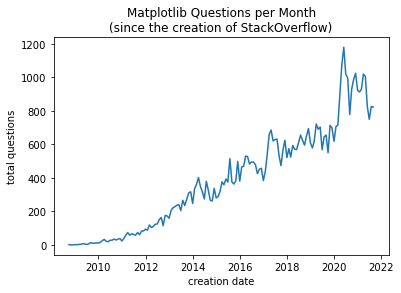

In [3]:
import matplotlib.pyplot as plt

# figsize is determined by rcParams for plt.plot()
plt.plot(stackoverflow_monthly.index, stackoverflow_monthly.matplotlib)

plt.xlabel('creation date')
plt.ylabel('total questions')
plt.title('Matplotlib Questions per Month\n(since the creation of StackOverflow)')

*Note: Since we ran `%matplotlib inline` earlier, we don't need to do anything to display our plot here. If we hadn't, we would need to call `plt.show()` to do so.*

#### Object-oriented approach

Text(0.5, 1.0, 'Matplotlib Questions per Month\n(since the creation of StackOverflow)')

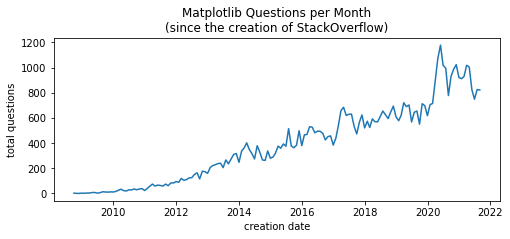

In [4]:
import matplotlib.pyplot as plt

# creates the Figure and adds a single Axes object
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(stackoverflow_monthly.index, stackoverflow_monthly.matplotlib)

ax.set_xlabel('creation date')
ax.set_ylabel('total questions')
ax.set_title('Matplotlib Questions per Month\n(since the creation of StackOverflow)')

*Tip: Take note that each of the plotting commands is returning something. These are Matplotlib objects that we can use to further customize the visualization as well.*

As mentioned before, we can use Matplotlib code to modify the plot that pandas created for us. Here, we will use the object-oriented approach to start the y-axis at 0 and keep the current setting for the end: 

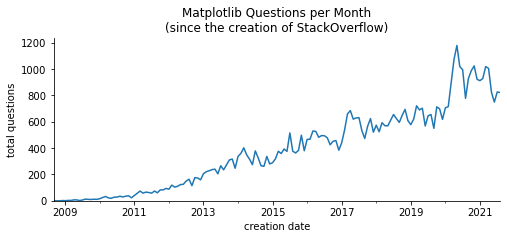

In [5]:
ax = stackoverflow_monthly.matplotlib.plot(
    figsize=(8, 3), xlabel='creation date', ylabel='total questions', 
    title='Matplotlib Questions per Month\n(since the creation of StackOverflow)',
)
ax.set_ylim(0, None) # this can also be done with pandas

# remove some of the spines (must be done with Matplotlib)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

*Tip: You can use the functional approach to change the y-axis limits by replacing `ax.set_ylim(0, None)` with `plt.ylim(0, None)`.*

Now that we have the basics down, let's see how to create other plot types and add additional components to them like legends, reference lines, and annotations. Note that the anatomy of a figure diagram we looked at earlier will help moving from idea to implementation since it helps identify the right keywords to search. It may also be helpful to bookmark [this](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf) Matplotlib cheat sheet.

## Learning Path

1. Why start with Matplotlib?
2. Matplotlib basics
3. **Plotting with Matplotlib**

## Plotting with Matplotlib

Now that we understand a little bit of how Matplotlib works, we will walk through some more involved examples, which include legends, reference lines, and/or annotations, building them up step by step. Note that while using a library like pandas to do the initial plot creation can makes things easier, we will focus on using Matplotlib exclusively to get more familiar with it.

### Line plot

The StackOverflow data we have been working with thus far is a time series, so the first set of visualizations will be studying the evolution of the data over time. However, rather than using a monthly aggregate like before, we will use daily data, so we will read in the data once more and this time aggregate it daily:

In [6]:
stackoverflow_daily = pd.read_csv(
    '../data/stackoverflow.zip', parse_dates=True, index_col='creation_date'
).loc[:,'pandas':'bokeh'].resample('1D').sum()
stackoverflow_daily.tail()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2021-09-08,132,33,49,5,2,0,2,1,1,1,0,2
2021-09-09,182,33,51,8,1,0,1,0,3,0,0,2
2021-09-10,132,19,44,7,4,0,0,0,2,0,0,2
2021-09-11,66,19,17,2,1,0,0,0,0,0,0,1
2021-09-12,69,14,24,3,0,1,0,0,0,0,0,0


We are going to visualize how the rolling 30-day average number of Matplotlib questions changed over time, along with the standard deviation. To do so, we first need to calculate these data points using pandas:

In [7]:
avgs = stackoverflow_daily.rolling('30D').mean()
stds = stackoverflow_daily.rolling('30D').std()

avgs.tail()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2021-09-08,136.933333,26.966667,37.133333,5.766667,1.833333,0.000000,0.500000,0.133333,0.500000,0.400000,0.033333,1.033333
2021-09-09,138.000000,27.033333,37.933333,5.766667,1.833333,0.000000,0.533333,0.133333,0.566667,0.400000,0.000000,1.033333
2021-09-10,137.100000,26.733333,37.966667,5.800000,1.833333,0.000000,0.533333,0.133333,0.566667,0.366667,0.000000,1.066667
2021-09-11,133.433333,26.400000,37.233333,5.666667,1.833333,0.000000,0.533333,0.133333,0.533333,0.333333,0.000000,1.000000
2021-09-12,130.466667,25.933333,36.666667,5.666667,1.733333,0.033333,0.533333,0.133333,0.533333,0.233333,0.000000,0.866667


Now, we can proceed to building this visualization. We will work through the following steps over the next few slides:
1. Create the line plot.
2. Add a shaded region for $\pm$2 standard deviations from the mean.
3. Set the axis labels, y-axis limits, plot title, and despine the plot.

#### 1. Create the line plot.

By default, the `plot()` method will return a line plot:

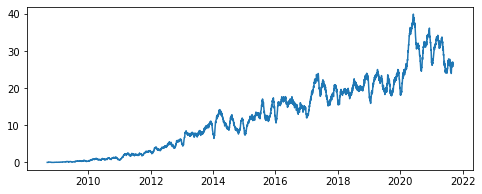

In [8]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(avgs.index, avgs.matplotlib)

#### 2. Add a shaded region for $\pm$2 standard deviations from the mean.

Next, we use the `fill_between()` method to shade the region $\pm$2 standard deviations from the mean. Note that we also set `alpha=0.25` to make the region 25% opaque &ndash; transparent enough to easily see the line for the rolling 30-day mean:

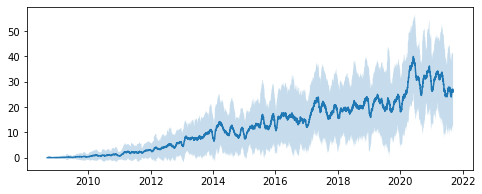

In [9]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(avgs.index, avgs.matplotlib)
ax.fill_between(
    avgs.index, avgs.matplotlib - 2 * stds.matplotlib, 
    avgs.matplotlib + 2 * stds.matplotlib, alpha=0.25
)

#### 3. Set the axis labels, y-axis limits, plot title, and despine the plot.

Now for the final touches. While in previous examples we used `ax.set_xlabel()`, `ax.set_ylabel()`, etc., here we use `ax.set()`, which allows us to set multiple attributes of the plot in a single method call.

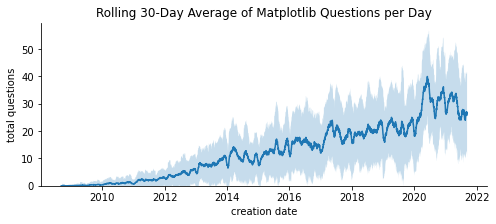

In [10]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(avgs.index, avgs.matplotlib)
ax.fill_between(
    avgs.index, avgs.matplotlib - 2 * stds.matplotlib, 
    avgs.matplotlib + 2 * stds.matplotlib, alpha=0.25
)

ax.set(
    xlabel='creation date', ylabel='total questions', ylim=(0, None),
    title='Rolling 30-Day Average of Matplotlib Questions per Day'
)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

Next, we will make a utility function to remove the top and right spines of our plots more easily going forward. It's considered good practice to return the `Axes` object:

In [11]:
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

*Note: Since we are working in a Jupyter Notebook, our figures are automatically closed after we run the cell. However, if you are working elsewhere, make sure to call `plt.close()` to free up those resources when you are finished.*

### Scatter plot

The `plot()` method can also be used to create scatter plots, but we have to pass in some additional information. Let's build up to a scatter plot of monthly Matplotlib questions with some "best fit" lines:

1. Create the scatter plot.
2. Convert to Matplotlib dates.
3. Add the best fit lines.
4. Label the axes, add a legend, and despine.
5. Format both the x- and y-axis tick labels.

#### 1. Create the scatter plot.

So far, we have passed x and y as positional arguments to the `plot()` method; however, there is a third argument we haven't explored: the format string (`fmt`) is a shorthand for specifying the marker (shape of the point), line style, and color to use for the plot. We can use this to create a scatter plot with the `plot()` method.

Note that while there is some flexibility in the order these are specified, it is recommended that we specify them in the following order: 

```python
fmt = '[marker][line][color]'
```

Here, we use the format string `ok` to create a scatter plot with black (`k`) circles (`o`); notice that we don't specify a line style because we don't want lines this time:

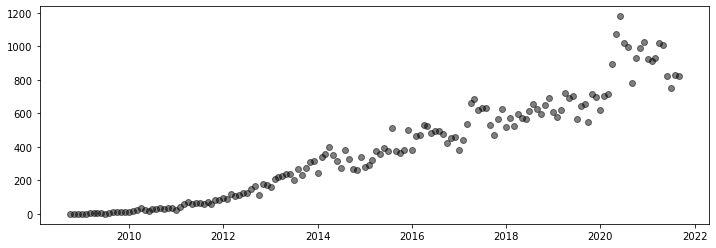

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(
    stackoverflow_monthly.index,
    stackoverflow_monthly.matplotlib, 
    'ok', label=None, alpha=0.5
)

*Tip: As an alternative, the `scatter()` method can be used to create a scatter plot, in which case we don't need to specify the format string (`fmt`).*

#### 2. Convert to Matplotlib dates.

In the previous example, we used `stackoverflow_monthly.index` as our x values. While Matplotlib was able to correctly show the years on the x-axis, when we try to add the best fit lines, we will have issues. This is because Matplotlib works with dates a little differently. To get around this, we will convert the dates to Matplotlib dates while we build up the plot; then, at the end, we will format them into a human-readable format.

We can use the `date2num()` function in the `matplotlib.dates` module to convert to Matplotlib dates:

In [13]:
import matplotlib.dates as mdates

x_axis_dates = mdates.date2num(stackoverflow_monthly.index)
x_axis_dates[:5]

array([14152., 14183., 14213., 14244., 14275.])

Now, let's update our plot to use these dates:

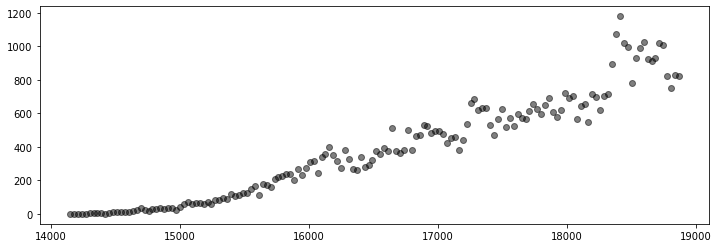

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(
    x_axis_dates, stackoverflow_monthly.matplotlib, 
    'ok', label=None, alpha=0.5
)

#### 3. Add the best fit lines.

We will use NumPy to obtain the best fit lines, which will be a first degree and a second degree polynomial. The `polyfit()` function fits a polynomial of the specified degree to our data and `poly1d()` instantiates a polynomial that we can evaluate at different x values to obtain the y values for the best fit line:

```python
import numpy as np

degree = 1
poly = np.poly1d(
    np.polyfit(x_axis_dates, stackoverflow_monthly.matplotlib, degree)
)
```

For each of these best fit lines, we will call the `plot()` method to add them to the scatter plot:

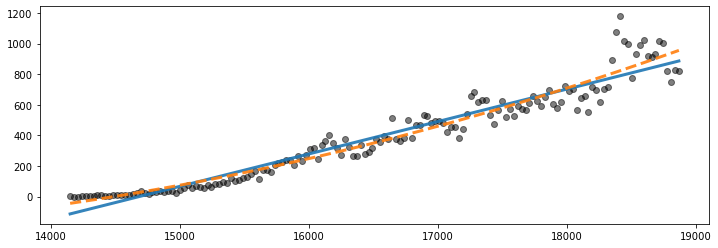

In [15]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_axis_dates, stackoverflow_monthly.matplotlib, 'ok', label=None, alpha=0.5)

for degree, linestyle in zip([1, 2], ['solid', 'dashed']):
    poly = np.poly1d(np.polyfit(x_axis_dates, stackoverflow_monthly.matplotlib, degree))
    ax.plot(
        x_axis_dates, poly(x_axis_dates), label=degree, 
        linestyle=linestyle, linewidth=3, alpha=0.9
    )

*Tip: We also specified `linestyle` to differentiate between the lines and `linewidth` to make them thicker. More info on the `zip()` function is available [here](https://realpython.com/python-zip-function/).*

Before moving on, let's package up this logic in a function:

In [16]:
def add_best_fit_lines(x, y):
    for degree, linestyle in zip([1, 2], ['solid', 'dashed']):
        poly = np.poly1d(np.polyfit(x, y, degree))
        ax.plot(
            x, poly(x), label=degree, 
            linestyle=linestyle, linewidth=3, alpha=0.9
        )
    return ax

#### 4. Label the axes, add a legend, and despine.

Next, we need to add a legend so we can tell the best fit lines apart. Now is also a good time to label our axes, give our plot a title, and adjust the limits of both the x- and y-axis (`xlim`/`ylim`). Here, we define a function that will add all of this to our plot and use the first date in the data as the start of the x-axis:

In [17]:
def add_labels(ax, xmin):
    ax.set(
        xlabel='creation date', ylabel='total questions',
        xlim=(xmin, None), ylim=(0, None),
        title='Matplotlib Questions per Month\n(since the creation of StackOverflow)'
    )
    ax.legend(title='degree') # add legend and give it a title
    return ax

Let's call this after the plotting code we built up so far and also despine our plot:

<AxesSubplot:title={'center':'Matplotlib Questions per Month\n(since the creation of StackOverflow)'}, xlabel='creation date', ylabel='total questions'>

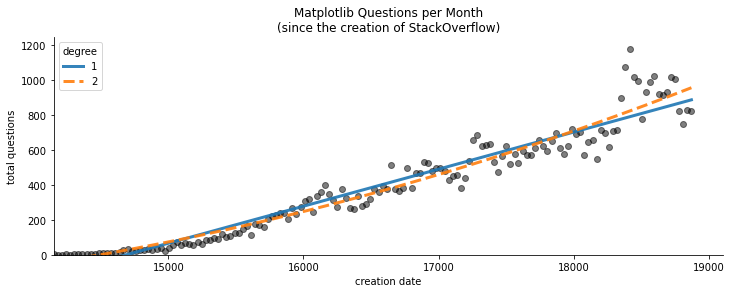

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_axis_dates, stackoverflow_monthly.matplotlib, 'ok', label=None, alpha=0.5)

add_best_fit_lines(x_axis_dates, stackoverflow_monthly.matplotlib)

add_labels(ax, x_axis_dates[0])
despine(ax)

####  5. Format both the x- and y-axis tick labels.

All that remains now is to clean up the tick labels on the axes: the x-axis should have human-readable dates and the y-axis can be improved by formatting the numbers for readability. For both, we will need to access the `Axis` objects contained in the `Axes` object via the `xaxis`/`yaxis` attribute:

```python
ax.xaxis # access the x-axis
ax.yaxis # access the y-axis
```

From there, we will use two methods to customize the *major* tick labels (as opposed to *minor*, which our plot isn't currently showing). We call the `set_major_locator()` method to adjust where the ticks are located, and the `set_major_formatter()` to adjust the format of the tick labels. For the x-axis, we will place ticks at 16-month intervals and format the labels as `%b\n%Y`, which places the month abbreviation above the year. This functionality comes from the `matplotlib.dates` module:

```python
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=16))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
```

The `matplotlib.ticker` module contains classes for tick location and formatting for non-dates. Here, we use the `StrMethodFormatter` class to provide a format string just as we would see with the `str.format()` method. This particular format specifies that the labels should be floats with commas as the thousands separator and zero digits after the decimal.

```python
from matplotlib import ticker

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
```

Now, let's put everything together in a function:

In [19]:
from matplotlib import ticker

def format_axes(ax):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=16))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    return ax

We now have all the pieces for our final visualization:

<AxesSubplot:title={'center':'Matplotlib Questions per Month\n(since the creation of StackOverflow)'}, xlabel='creation date', ylabel='total questions'>

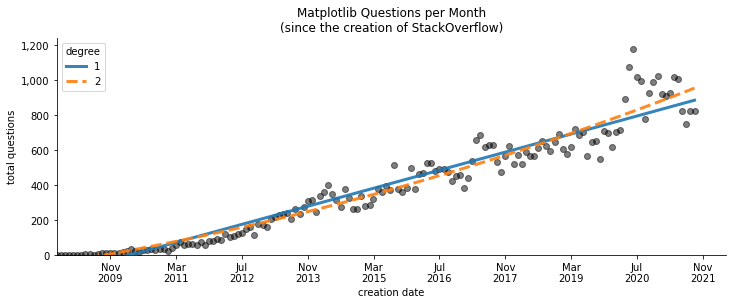

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_axis_dates, stackoverflow_monthly.matplotlib, 'ok', label=None, alpha=0.5)

add_best_fit_lines(x_axis_dates, stackoverflow_monthly.matplotlib)

add_labels(ax, x_axis_dates[0])
despine(ax)
format_axes(ax)

*Tip: Use `EngFormatter` instead of `StrMethodFormatter` for engineering notation.*

### Area plot

We have just been using the Matplotlib questions time series, but it's also interesting to look at trends for multiple libraries. Since the libraries in this dataset vary in age, popularity, and number of StackOverflow questions, a good option to view many at once is an area plot. This will give us an idea of both the overall trend for these types of libraries and the libraries themselves. Let's start by subsetting our monthly StackOverflow questions data to the top four libraries by number of questions:

In [21]:
subset = stackoverflow_daily.sum().nlargest(4)
top_libraries_monthly = stackoverflow_monthly.reindex(columns=subset.index)
top_libraries_monthly.head()

,pandas,numpy,matplotlib,seaborn
creation_date,,,,
2008-09-30,0,3,2,0
2008-10-31,0,2,0,0
2008-11-30,0,3,0,0
2008-12-31,0,4,2,0
2009-01-31,0,7,1,0


Now, we can build up our plot. Once again, we will break this down in steps:
1. Create the area plot.
2. Label and format the axes, provide a title, and despine the plot.
3. Add annotations.

#### 1. Create the area plot.

First, we use `stackplot()` to create the area plot as our starting point. Note that we are using Matplotlib dates from the start rather than switching when we add the annotations:

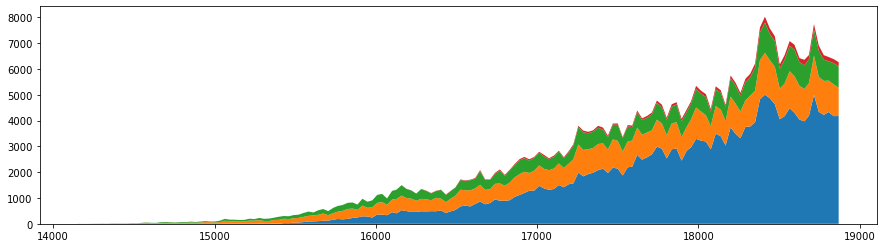

In [22]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.stackplot(
    mdates.date2num(top_libraries_monthly.index),
    top_libraries_monthly.to_numpy().T, # each element is a library's time series
    labels=top_libraries_monthly.columns
)

#### 2. Label and format the axes, provide a title, and despine the plot.
Next, we will handle labels and formatting before working on the annotations. This should look familiar from previous examples:

<AxesSubplot:title={'center':'StackOverflow Questions per Month'}, ylabel='tagged questions'>

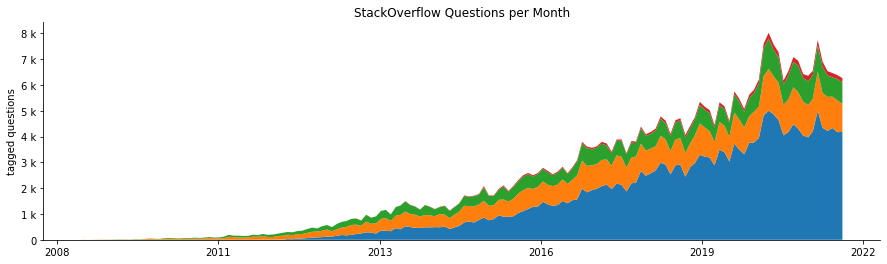

In [23]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.stackplot(
    mdates.date2num(top_libraries_monthly.index),
    top_libraries_monthly.to_numpy().T, 
    labels=top_libraries_monthly.columns
)
ax.set(xlabel='', ylabel='tagged questions', title='StackOverflow Questions per Month')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
despine(ax)

This will be the basis of a couple of visualizations we do in this section, so let's make a function for what we have so far:

In [24]:
def area_plot(data):
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.stackplot(
        mdates.date2num(data.index),
        data.to_numpy().T, 
        labels=data.columns
    )
    ax.set(
        xlabel='', ylabel='tagged questions',
        title='StackOverflow Questions per Month'
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
    return ax

#### 3. Add annotations.
Rather than use a legend for this plot, we are going to use annotations to label each area and provide the median value in 2021. To create annotations, we use the `annotate()` method with the following arguments:

- The first argument (`text`) is the annotation text as a string.
- The `xy` argument is a tuple of the coordinates for the data point that we are annotating.
- The `xytext` argument is a tuple of the coordinates where we want to place the annotation text.
- When providing `xytext`, we can optionally provide `arrowprops`, which defines the style to use for the arrow pointing from `xytext` to `xy`.
- We can also customize alignment of the text horizontally (`ha`) and vertically (`va`).

We will annotate pandas, NumPy and Matplotlib alongside their areas, but seaborn will be moved higher up and to the right using an arrow to point to its area (since it is thin). Once again, we will place this logic in a function for reuse later:

In [25]:
def annotate(ax, data):
    total = 0
    for i, library in enumerate(data.columns):
        last = data.last('1D')[library]
        last_day, last_value = last.index[0], last.iat[0]
        if library in ['pandas', 'numpy', 'matplotlib']:
            kwargs = {}
        else:
            kwargs = dict(
                xytext=(last_day + pd.Timedelta(days=20), (last_value + total) * 1.1),
                arrowprops=dict(arrowstyle='->')
            )

        ax.annotate(
            f' {library}: {data.loc["2021", library].median():,.0f}',
            xy=(last_day, last_value/2 + total), ha='left', va='center', **kwargs
        )
        total += last_value
    return ax

Now, let's see what our plot looks like so far:

<AxesSubplot:title={'center':'StackOverflow Questions per Month'}, ylabel='tagged questions'>

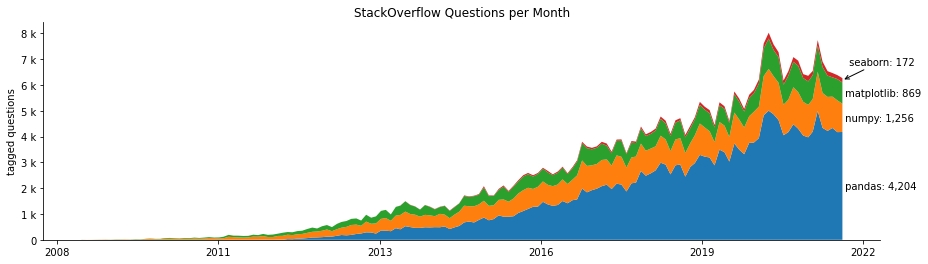

In [26]:
ax = area_plot(top_libraries_monthly)
annotate(ax, top_libraries_monthly)

*Tip: You can use $LaTeX$ symbols when providing text (annotations, titles, etc.) to Matplotlib commands, e.g., using `r'$\alpha$'` will be rendered as $\alpha$. See [this](https://matplotlib.org/stable/tutorials/text/mathtext.html) page in the documentation for more information.*

Before we move on to our next plot, which builds upon this one, let's update our `area_plot()` function to include the call to the `annotate()` function:

In [27]:
def area_plot(data):
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.stackplot(
        mdates.date2num(data.index),
        data.to_numpy().T, 
        labels=data.columns
    )
    ax.set(
        xlabel='', ylabel='tagged questions',
        title='StackOverflow Questions per Month'
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
    annotate(ax, data)
    return ax

#### More Annotations
The StackOverflow community is very active, and you will frequently see old questions updated with new answers reflecting the latest solutions. The dataset we have been working with contains several examples of this: Seaborn makes some plotting tasks a lot easier than Matplotlib, so some of the StackOverflow questions that are currently tagged "seaborn" were originally posted before Seaborn's first release ([v0.1](https://github.com/mwaskom/seaborn/releases/tag/v0.1)) on October 28, 2013. See the [Color by Column Values in Matplotlib](https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib) question for an example.

Let's use reference lines and a shaded region to highlight this section on the area plot.

First, we will add a dashed vertical line for Seaborn's first release (October 28, 2013) using the `axvline()` method:

Text(2013-10-28, 4000, 'seaborn v0.1')

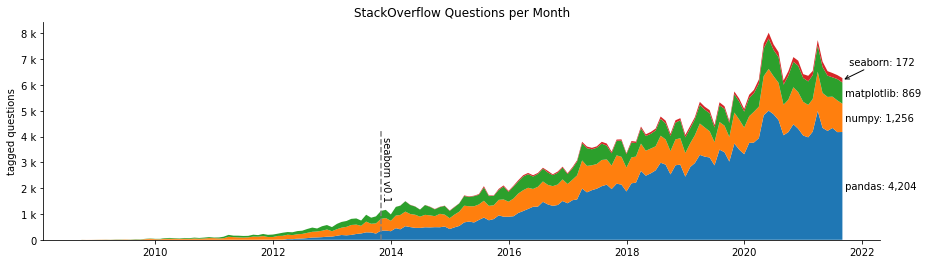

In [28]:
import datetime as dt

ax = area_plot(top_libraries_monthly)
    
# mark when seaborn was created
seaborn_released = dt.date(2013, 10, 28)
ax.axvline(seaborn_released, ymax=0.5, color='gray', linestyle='dashed')
ax.annotate('seaborn v0.1', xy=(seaborn_released, 4000), rotation=-90, va='top')

Next, we'll make an additional vertical line for the oldest question that was retroactively tagged "seaborn":

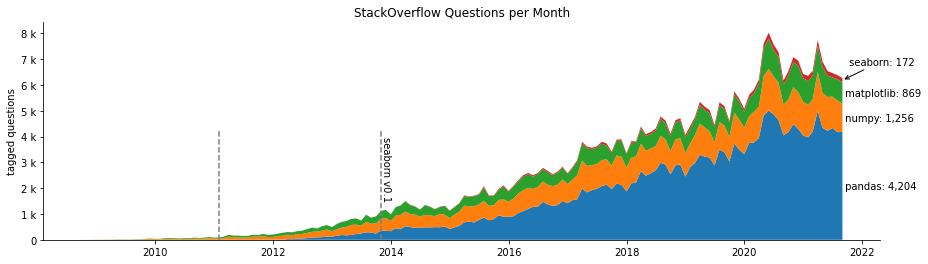

In [29]:
ax = area_plot(top_libraries_monthly)

seaborn_released = dt.date(2013, 10, 28)
ax.axvline(seaborn_released, ymax=0.5, color='gray', linestyle='dashed')
ax.annotate('seaborn v0.1', xy=(seaborn_released, 4000), rotation=-90, va='top')

# oldest question tagged "seaborn"
first_seaborn_qs = top_libraries_monthly.query('seaborn >= 1')\
    .first('1D').index[0].to_pydatetime().date()
ax.axvline(first_seaborn_qs, ymax=0.5, color='gray', linestyle='dashed')

Let's package this reference line logic up in a function before looking at how to shade the region between them:

In [30]:
def add_reflines(ax, data):
    seaborn_released = dt.date(2013, 10, 28)
    ax.axvline(seaborn_released, ymax=0.5, color='gray', linestyle='dashed')
    ax.annotate('seaborn v0.1', xy=(seaborn_released, 4000), rotation=-90, va='top')

    first_seaborn_qs = \
        data.query('seaborn >= 1').first('1D').index[0].to_pydatetime().date()
    ax.axvline(first_seaborn_qs, ymax=0.5, color='gray', linestyle='dashed')
    return ax

Finally, we use the `axvspan()` method to shade in the region between the lines:

Text(15505.0, 3000, 'posts retroactively tagged\n"seaborn"')

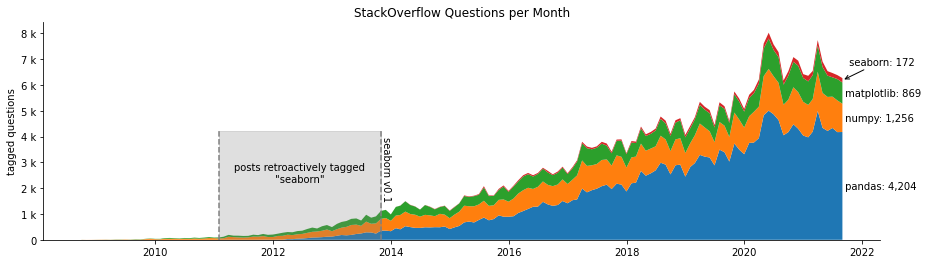

In [31]:
ax = area_plot(top_libraries_monthly)
add_reflines(ax, top_libraries_monthly)

# shade the region of posts that were retroactively tagged "seaborn"
ax.axvspan(
    ymin=0, ymax=0.5, xmin=mdates.date2num(first_seaborn_qs),
    xmax=mdates.date2num(seaborn_released), color='gray', alpha=0.25
)
middle = (seaborn_released - first_seaborn_qs)/2 + first_seaborn_qs
ax.annotate(
    'posts retroactively tagged\n"seaborn"', 
    xy=(mdates.date2num(middle), 3000), 
    va='top', ha='center'
)

### Bar plot

The upper left region of the area plot we just worked on has a lot of whitespace. We can use this space to provide additional information with an inset plot. Let's work on adding an inset bar plot that shows total questions per library:

1. Add the inset `Axes` object to the `Figure` object.
2. Create the horizontal bar plot.
3. Label and format the plot.

#### 1. Add the inset `Axes` object to the `Figure` object.

First, we need to modify our `area_plot()` function to return the `Figure` object as well:

In [32]:
def area_plot(data):
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.stackplot(
        mdates.date2num(data.index),
        data.to_numpy().T, 
        labels=data.columns
    )
    ax.set(
        xlabel='', ylabel='tagged questions',
        title='StackOverflow Questions per Month'
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
    annotate(ax, data)
    return fig, ax

Now, we can call our updated `area_plot()` function and use the `Figure` object that it returns to add the inset plot via the `add_axes()` method. This method receives the dimensions as a sequence of 4 values, represented as percentages of `Figure` dimensions:
1. `left`: Offset from the left edge of the `Figure` (i.e., the `x`).
2. `bottom`: Offset from the bottom edge of the `Figure` (i.e., the `y`).
3. `width`: The width of the inset.
4. `height`: The height of the inset.

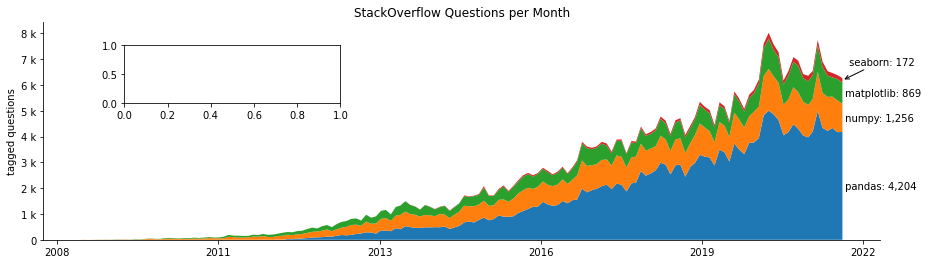

In [33]:
fig, ax = area_plot(top_libraries_monthly)
inset_ax = fig.add_axes([0.2, 0.6, 0.2, 0.2])

*Tip: Check out the [axes_grid1 toolkit](https://matplotlib.org/stable/tutorials/toolkits/axes_grid.html#insetlocator) if you want the inset to contain a "zoomed in" version of the data.*

#### 2. Create the horizontal bar plot.

Next, we use the `barh()` method to add horizontal bars to the inset. These bars will represent total questions for each of the libraries in the area plot, so we will also need to make sure the colors align. For this, we use the `collections` attribute to access each of the sections of the area plot and grab their colors with the `get_facecolor()` method:

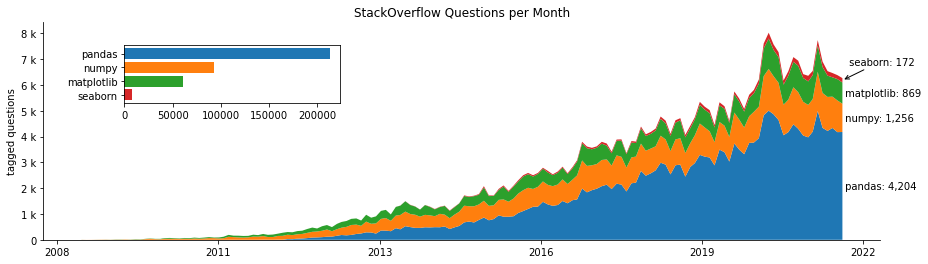

In [34]:
fig, ax = area_plot(top_libraries_monthly)
inset_ax = fig.add_axes([0.2, 0.6, 0.2, 0.2])
colors = {area.get_label(): area.get_facecolor() for area in ax.collections}

# populate the inset with a bar plot of total questions
total_qs = top_libraries_monthly.sum()
inset_ax.barh(
    total_qs.index, total_qs.to_numpy(),
    color=[colors[label] for label in colors.keys()]
)
inset_ax.invert_yaxis() # sort bars in descending order

#### 3. Label and format the plot.
Labeling and formatting the inset works the same as we've seen before:

Text(0.5, 0, 'total questions')

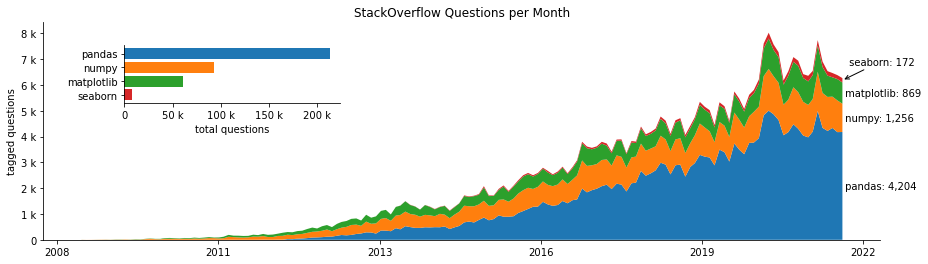

In [35]:
fig, ax = area_plot(top_libraries_monthly)
inset_ax = fig.add_axes([0.2, 0.6, 0.2, 0.2])
colors = {area.get_label(): area.get_facecolor() for area in ax.collections}

total_qs = top_libraries_monthly.sum()
inset_ax.barh(
    total_qs.index, total_qs.to_numpy(), 
    color=[colors[label] for label in colors.keys()]
)
inset_ax.invert_yaxis()
despine(inset_ax)
inset_ax.xaxis.set_major_formatter(ticker.EngFormatter())
inset_ax.set_xlabel('total questions')

Final remarks on this example:

- More complicated subplot layouts can be created with [GridSpec](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-multicolumn-py).
- We used both dictionary and list comprehensions here &ndash; check out [this article](https://www.geeksforgeeks.org/comprehensions-in-python/) for more information on comprehensions in Python.

#### Annotating bars

Our inset only shows data for four of the libraries in the StackOverflow dataset to match the area plot. Due to the smaller scale of the other libraries, it didn't make sense to include them in the area plot; however, we can visualize total questions for each of them with a bar plot if we use a log scale for the x-axis. This time our bar plot won't just be an inset, and we will explore how to annotate the bars.

Our data looks like this:

In [36]:
questions_per_library = pd.read_csv(
    '../data/stackoverflow.zip', parse_dates=True, index_col='creation_date'
).loc[:,'pandas':'bokeh'].sum().sort_values()
questions_per_library

yellowbrick        54
geoviews           63
hvplot             92
holoviews         542
vega              598
altair            804
geopandas        1652
bokeh            4386
seaborn          7414
matplotlib      60554
numpy           93797
pandas         214919
dtype: int64

We will work through the following steps to create this visualization:

1. Create the bar plot.
2. Label, format, and apply a log scale to the plot.
3. Annotate each of the bars.

#### 1. Create the bar plot.
We once again use the `barh()` method to create horizontal bars; however, note that the `bar()` method can be used to create vertical bars:

<BarContainer object of 12 artists>

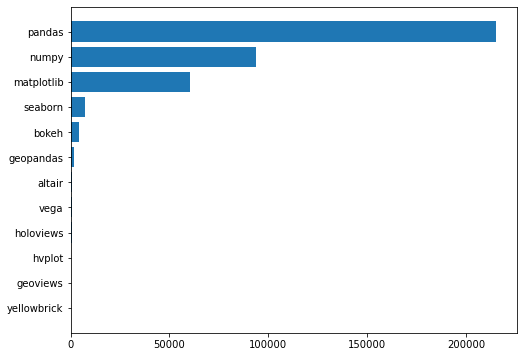

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(questions_per_library.index, questions_per_library.to_numpy())

#### 2. Label, format, and apply a log scale to the plot.
To change the scale of an axis, we specify a value for `xscale`/`yscale` or pass in a value to the `set_xscale()`/`set_yscale()` method:

```python
ax.set_xscale('log')
ax.set(xscale='log')
```

Now, we can actually see all the bars:

<AxesSubplot:xlabel='total questions'>

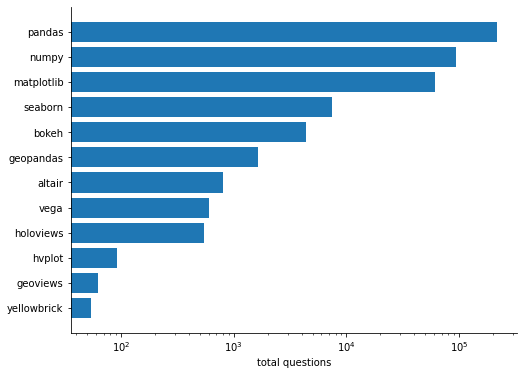

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(questions_per_library.index, questions_per_library.to_numpy())
ax.set(xlabel='total questions', xscale='log')
despine(ax)

#### 3. Annotate each of the bars.

To annotate the bars, we need to grab them off the `Axes` object, similar to how we grabbed the colors from the area plot. To access the bars, we use the `patches` attribute. Here, we write a function to iterate over each of these patches and annotate each bar with the total number of questions for that library:

In [39]:
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():,d} ',
            va='center_baseline', ha='right', color='white'
        )
    return ax

Putting everything together, our final visualization looks like this:

<AxesSubplot:xlabel='total questions'>

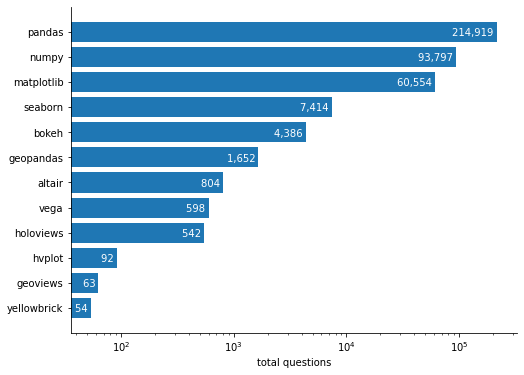

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(questions_per_library.index, questions_per_library.to_numpy())
ax.set(xlabel='total questions', xscale='log')
despine(ax)
annotate_bars(ax)

#### Stacked bar plot
For the next few examples, we will be creating a stacked bar plot showing co-occurrences of the library tags. This gives us an idea of relationships between the libraries and how people use them. Converting the original dataset into the adjacency matrix we will need for these visualizations is not important for this training, so we will just read in a file with the adjacency matrix; however, those interested in the code behind this can find it in the [stackoverflow.ipynb](../data/collection/stackoverflow.ipynb) notebook.

Our data looks as follows. Here, we see that the largest co-occurrence with **hvplot** is **holoviews** followed by **bokeh**.

In [41]:
co_occur = pd.read_csv(
    '../data/stackoverflow_tag_co_occurrences.csv',
    index_col='library'
)
co_occur

,hvplot,geoviews,seaborn,holoviews,geopandas,matplotlib,numpy,bokeh,pandas
library,,,,,,,,,
hvplot,0.000000,0.032609,0.021739,0.539855,0.048913,0.023551,0.000000,0.110507,0.103261
geoviews,0.047619,0.000000,0.000000,0.431217,0.058201,0.039683,0.007937,0.140212,0.084656
seaborn,0.000270,0.000000,0.000000,0.000135,0.000607,0.468033,0.015871,0.002001,0.230780
holoviews,0.091636,0.050123,0.001845,0.000000,0.003075,0.030750,0.010148,0.371771,0.066113
geopandas,0.002724,0.002220,0.002724,0.001009,0.000000,0.118644,0.009988,0.011703,0.250504
matplotlib,0.000036,0.000041,0.057304,0.000275,0.003237,0.000000,0.087198,0.001594,0.135548
numpy,0.000000,0.000005,0.001254,0.000059,0.000176,0.056294,0.000000,0.000144,0.167267
bokeh,0.002318,0.002014,0.003382,0.045942,0.004408,0.022002,0.003078,0.000000,0.087855
pandas,0.000044,0.000025,0.007961,0.000167,0.001926,0.038191,0.073000,0.001793,0.000000


Note that the diagonal contains all zeros because we also want to understand what percentage of questions per library were also tagged with another library in this dataset. For example, most questions tagged with **hvplot** or **geoviews** were also tagged with another library in our list, but questions tagged with **pandas** were only tagged with another library 12.3% of the time:

In [42]:
co_occur.sum(axis=1)

library
hvplot        0.880435
geoviews      0.809524
seaborn       0.717696
holoviews     0.625461
geopandas     0.399516
matplotlib    0.285233
numpy         0.225199
bokeh         0.170999
pandas        0.123107
dtype: float64

In this example, we will also see another way of formatting an axis with `ticker` and learn how to customize colors. Let's work through the following steps:
1. Create the stacked bar plot.
2. Add the legend.
3. Label and format the plot.
4. Annotate the bars.
5. Change the color scheme.

##### 1. Create the stacked bar plot.
To make our stacked bar plot, we can still use the `barh()` method; however, we have to make multiple calls to it, each time specifying where the starting point should be (i.e., the end of the previous portion of the bar). We will package this logic up in a function:

In [43]:
def stacked_bars(data):
    fig, ax = plt.subplots()
    labels = co_occur.index

    last = 0
    for library in labels:
        data = co_occur.loc[labels, library]
        ax.barh(labels, data, label=library, left=last)
        last += data
    
    ax.invert_yaxis()
    return despine(ax)

Calling our function gives us the start of our stacked bar plot visualization:

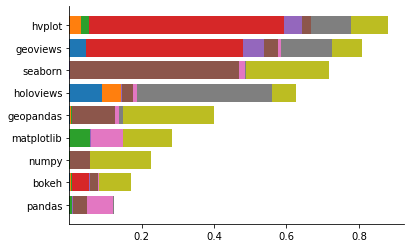

In [44]:
ax = stacked_bars(co_occur)

##### 2. Add the legend.
Next, we add a legend to understand what the colors mean:

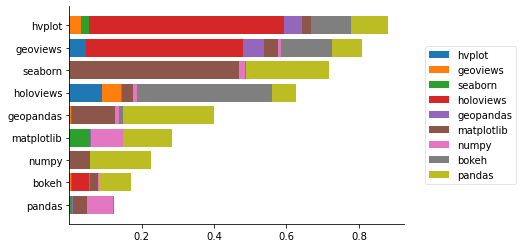

In [45]:
ax = stacked_bars(co_occur)
ax.legend(bbox_to_anchor=(1.35, 0.5), loc='center right', framealpha=0.5)

##### 3. Label and format the plot.
Then, we label our x-axis and set the limits of the x-axis (`xlim`) so that it goes from 0% to 100%. We also use `ticker.PercentFormatter` to display our x-axis tick labels as percentages. Note that we passed in `xmax=1` when instantiating it because our data already contains percentages, but passing in the maximum value in the data will calculate the percentages:

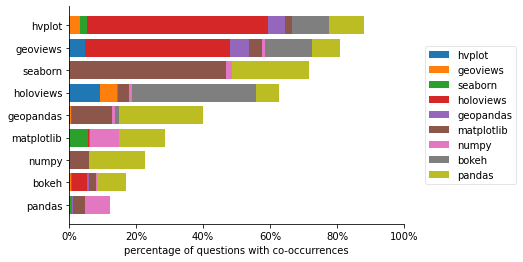

In [46]:
ax = stacked_bars(co_occur)
ax.legend(bbox_to_anchor=(1.35, 0.5), loc='center right', framealpha=0.5)
ax.set(xlabel='percentage of questions with co-occurrences', xlim=(0, 1))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

Before moving on, let's update our function to include what we have so far:

In [47]:
def stacked_bars(data):
    fig, ax = plt.subplots()
    labels = co_occur.index

    last = 0
    for library in labels:
        data = co_occur.loc[labels, library]
        ax.barh(labels, data, label=library, left=last)
        last += data
    
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor=(1.35, 0.5), loc='center right', framealpha=0.5)
    ax.set(xlabel='percentage of questions with co-occurrences', xlim=(0, 1))
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    return despine(ax)

##### 4. Annotate the bars.
As with the previous example, we annotate our bars after accessing each via the `patches` attribute on the `Axes` object. However, this time we only label bars whose values surpass a threshold &ndash; note that the value of a bar here is its width:

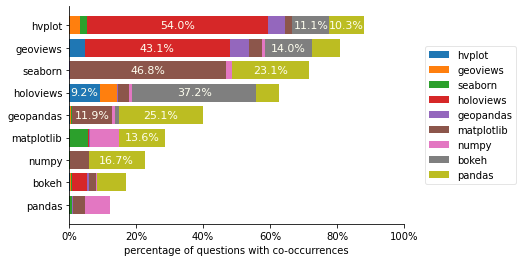

In [48]:
ax = stacked_bars(co_occur)

for patch in ax.patches:
    width = patch.get_width()
    if width > .09:
        ax.text(
            patch.get_x() + width/2, patch.get_y() + patch.get_height()/2,
            f'{width:.1%}', va='center', ha='center', color='ivory', fontsize=11
        )

*Tip: The full list of colors Matplotlib recognizes by name can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py).*

##### 5. Change the color scheme.
Throughout this workshop, we have been using default colormaps. For this visualization, we will take a look at how to change the colormap. Note that this is only one way of working with colormaps.

We will start by importing the `cm` module, which contains all the colormaps (full list [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py)). For this example, we will select the `tab10` qualitative colormap and reverse its order:

In [49]:
from matplotlib import cm

cmap = cm.get_cmap('tab10').reversed()

*Note: The colormap we selected is the default colormap, but reversing it will change the order in which the colors are assigned. Since we have nine elements and ten colors, we will see a new color this time.*

The colormap object is a **callable**:

In [50]:
[cmap(i) for i in range(10)]

[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)]

*Tip: Learn more about callables [here](https://www.pythonmorsels.com/topics/callables/).*

This means that when we update our `stacked_bars()` function to accept a colormap, we also need to update our `for` loop:

In [51]:
def stacked_bars(data, cmap):
    fig, ax = plt.subplots()
    labels = co_occur.index

    last = 0
    for i, library in enumerate(labels):
        data = co_occur.loc[labels, library]
        ax.barh(labels, data, label=library, left=last, color=cmap(i))
        last += data
    
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor=(1.35, 0.5), loc='center right', framealpha=0.5)
    ax.set(xlabel='percentage of questions with co-occurrences', xlim=(0, 1))
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    return despine(ax)

Calling the updated function with the reversed colormap changes the colors on each of the bars:

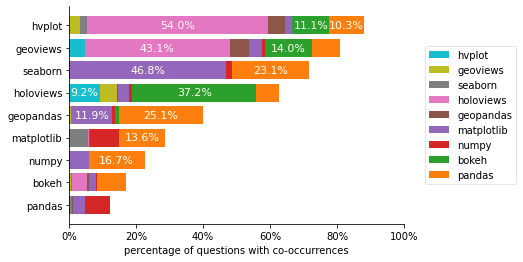

In [52]:
ax = stacked_bars(co_occur, cmap)

for patch in ax.patches:
    width = patch.get_width()
    if width > .09:
        ax.text(
            patch.get_x() + width/2, patch.get_y() + patch.get_height()/2,
            f'{width:.1%}', va='center', ha='center', color='ivory', fontsize=11
        )

### Histogram

We will now be switching to a different dataset for the final two plot types that we will be discussing. The new dataset we will be working with contains NYC subway entrances and exits per borough per day for 2017-2021. It was resampled from [this](https://www.kaggle.com/eddeng/nyc-subway-traffic-data-20172021?select=NYC_subway_traffic_2017-2021.csv) Kaggle dataset created through some extensive data wrangling by Kaggle user [Edden](https://www.kaggle.com/eddeng). Our dataset that looks like this:

In [53]:
subway = pd.read_csv(
    '../data/NYC_subway_daily.csv', parse_dates=['Datetime'], 
    index_col=['Borough', 'Datetime']
)
subway_daily = subway.unstack(0)
subway_daily.head()

Entries                                    Exits            \
Borough            Bk        Bx          M         Q        Bk        Bx   
Datetime                                                                   
2017-02-04   617650.0  247539.0  1390496.0  408736.0  417449.0  148237.0   
2017-02-05   542667.0  199078.0  1232537.0  339716.0  405607.0  139856.0   
2017-02-06  1184916.0  472846.0  2774016.0  787206.0  761166.0  267991.0   
2017-02-07  1192638.0  470573.0  2892462.0  790557.0  763653.0  270007.0   
2017-02-08  1243658.0  497412.0  2998897.0  825679.0  788356.0  275695.0   

                                 
Borough             M         Q  
Datetime                         
2017-02-04  1225689.0  279699.0  
2017-02-05  1033610.0  268626.0  
2017-02-06  2240027.0  537780.0  
2017-02-07  2325024.0  544828.0  
2017-02-08  2389534.0  559639.0

We will build a histogram of daily subway entries in Manhattan with this data using the following steps:
1. Create the histogram.
2. Label and format the plot.
3. Explore the use of subplots.

#### 1. Create the histogram.
To create a histogram, we use the `hist()` method:

(array([  4.,  35.,  40.,  34.,   4.,   3.,   7.,  32.,  98., 108.]),
 array([ 857859. , 1087318.1, 1316777.2, 1546236.3, 1775695.4, 2005154.5,
        2234613.6, 2464072.7, 2693531.8, 2922990.9, 3152450. ]),
 <BarContainer object of 10 artists>)

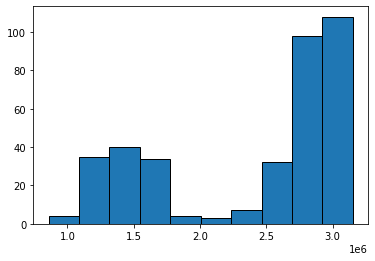

In [54]:
fig, ax = plt.subplots()
ax.hist(subway_daily.loc['2018', 'Entries']['M'], ec='black')

#### 2. Label and format the plot.
Next, we clean up the plot by labeling axes and formatting the tick labels:

<AxesSubplot:title={'center':'Histogram of Daily Subway Entries in Manhattan'}, xlabel='Entries', ylabel='Frequency'>

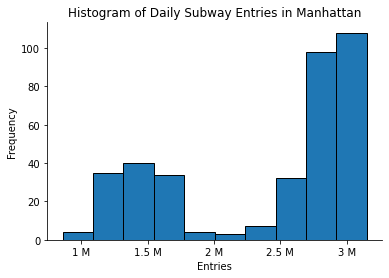

In [55]:
fig, ax = plt.subplots()
ax.hist(subway_daily.loc['2018', 'Entries']['M'], ec='black')
ax.set(
    xlabel='Entries', ylabel='Frequency',
    title='Histogram of Daily Subway Entries in Manhattan'
)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
despine(ax)

#### 3. Explore the use of subplots.
The histogram of daily subway entries in Manhattan shows a distribution that is clearly bimodal. Let's use subplots to separate out the weekday and weekend distributions that combine to form the shape that we are seeing.

First, we will need to create a Boolean mask to be able to filter our data by weekday versus weekend:

In [56]:
weekday_mask = subway_daily.index.weekday < 5
weekday_mask

array([False, False,  True, ...,  True,  True,  True])

Next, we will need to update our call to `plt.subplots()` to specify one row of two columns as our layout, with all subplots sharing the same x-axis range (`sharex=True`). Since there are fewer weekend days than weekdays in the year, we don't share the y-axis (`sharey=False`). As before, we call the `hist()` method to add the histogram to each of the subplots:

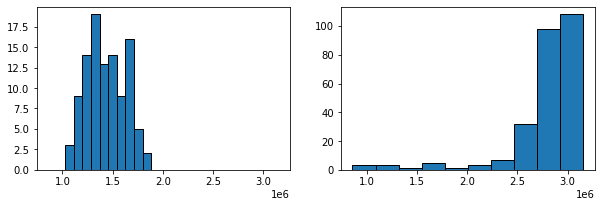

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=False)

for ax, mask in zip(axes, [~weekday_mask, weekday_mask]):
    ax.hist(subway_daily[mask].loc['2018', 'Entries']['M'], ec='black')

*Tip: When iterating over layouts with multiple rows and columns (e.g., a 2x2 layout), you can call the `flatten()` method on the NumPy ndarray of `Axes` objects before iterating over them to go one by one rather than row by row.*

Now, let's label and format the subplots. We will use the x-axis label to distinguish between the weekday and weekend distributions, and we will only provide a label for the y-axis of the leftmost plot to reduce clutter. This requires that we include a label in our `for` loop. Here, we are also updating the x-axis tick label format to use engineering notation:

Text(0, 0.5, 'Frequency')

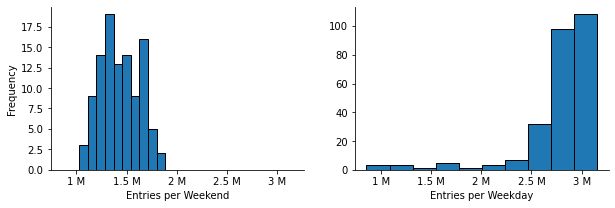

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=False)

for ax, mask, label in zip(axes, [~weekday_mask, weekday_mask], ['Weekend', 'Weekday']):
    ax.hist(subway_daily[mask].loc['2018', 'Entries']['M'], ec='black')
    ax.set_xlabel(f'Entries per {label}')
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
axes[0].set_ylabel('Frequency')

Since we have multiple subplots, we need to call the `suptitle()` method on the `Figure` object to provide a title for the whole visualization. This shows the clear shift in subway usage between weekdays and weekends, along with the effect of the bridge-and-tunnel crowd:

Text(0.5, 0.98, 'Histogram of Daily Subway Entries in Manhattan')

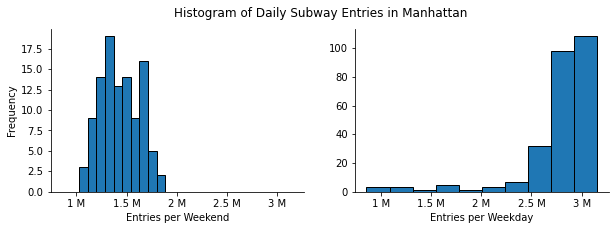

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=False)

for ax, mask, label in zip(axes, [~weekday_mask, weekday_mask], ['Weekend', 'Weekday']):
    ax.hist(subway_daily[mask].loc['2018', 'Entries']['M'], ec='black')
    ax.set_xlabel(f'Entries per {label}')
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
axes[0].set_ylabel('Frequency')
fig.suptitle('Histogram of Daily Subway Entries in Manhattan')

### Box plot
As an alternative to the previous visualization, we will create box plots. Our initial code looks very similar &ndash; we just call the `boxplot()` method instead of the `hist()` method:

Text(0.5, 0.98, 'Box Plot of Daily Subway Entries in Manhattan')

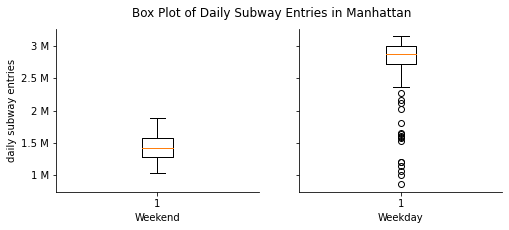

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
for ax, mask, label in zip(axes, [~weekday_mask, weekday_mask], ['Weekend', 'Weekday']):
    ax.boxplot(subway_daily[mask].loc['2018', 'Entries']['M'])
    ax.set_xlabel(label)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
axes[0].set_ylabel('daily subway entries')
fig.suptitle('Box Plot of Daily Subway Entries in Manhattan')

However, this time each of the subplots has a single tick with the label **1**. Rather than setting the x-axis label, we will need to use the `set_xticklabels()` method:

Text(0.5, 0.98, 'Box Plot of Daily Subway Entries in Manhattan')

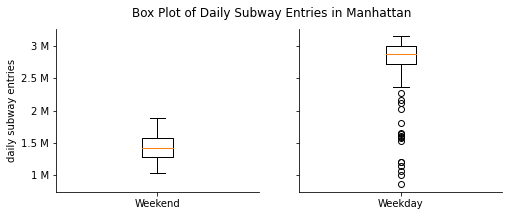

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
for ax, mask, label in zip(axes, [~weekday_mask, weekday_mask], ['Weekend', 'Weekday']):
    ax.boxplot(subway_daily[mask].loc['2018', 'Entries']['M'])
    ax.set_xticklabels([label]) # label the ticks instead of the axis this time
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
axes[0].set_ylabel('daily subway entries')
fig.suptitle('Box Plot of Daily Subway Entries in Manhattan')

The final tweak we will cover in this section is the `tight_layout()` method, which will adjust the layout of the visualization to make better use of the space (more info [here](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html?highlight=tight%20layout%20guide)). Notice that here it reduced the space between the subplots by adjusting the length of the x-axis of each subplot. This method can also be useful when labels are partially covered:

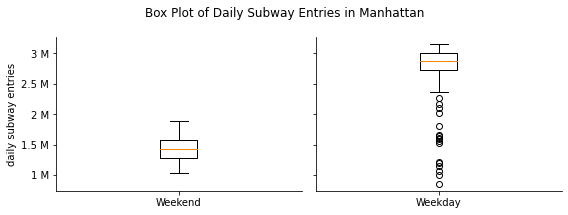

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
for ax, mask, label in zip(axes, [~weekday_mask, weekday_mask], ['Weekend', 'Weekday']):
    ax.boxplot(subway_daily[mask].loc['2018', 'Entries']['M'])
    ax.set_xticklabels([label])
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    despine(ax)
axes[0].set_ylabel('daily subway entries')
fig.suptitle('Box Plot of Daily Subway Entries in Manhattan')
fig.tight_layout()

*Tip: Save any of the visualizations we've built by calling the `plt.savefig()` function or the `savefig()` method on the `Figure` object as the last line in the cell generating the plot.*

### Additional resources

We've covered a lot of Matplotlib, but there is still more to learn. Here are some additional resources on what we covered:

- Legend guide [tutorial](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html)
- `matplotlib.dates` [API summary](https://matplotlib.org/stable/api/dates_api.html)
- `matplotlib.pyplot` [API summary](https://matplotlib.org/stable/api/pyplot_summary.html)
- `matplotlib.ticker` [API summary](https://matplotlib.org/stable/api/ticker_api.html)
- More on annotations [here](https://matplotlib.org/stable/tutorials/text/annotations.html) and [here](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)
- Text properties and layout [tutorial](https://matplotlib.org/stable/tutorials/text/text_props.html)

The following are some additional avenues for exploration:

- Autoscaling [tutorial](https://matplotlib.org/stable/tutorials/intermediate/autoscale.html)
- Custom plot layouts with GridSpec [tutorial](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html)
- Easily varying colors, line styles, etc. with [cycler](https://matplotlib.org/stable/tutorials/intermediate/color_cycle.htmlhttps://matplotlib.org/stable/tutorials/intermediate/color_cycle.html)
- Plot configuration with [style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.htmlhttps://matplotlib.org/stable/tutorials/introductory/customizing.html)
- Matplotlib toolkits:
    - [3D plots with mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py)
    - [plot layouts with axes_grid1](https://matplotlib.org/stable/tutorials/toolkits/axes_grid.html)
- Working with images [demo](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)

## Up Next: Moving Beyond Static Visualizations

Let's take a 25-minute break for some exercises to check your understanding:

1. Using the data in `weather.csv`, make a vertical bar plot showing total monthly precipitation (`PRCP`) in Seattle.
2. Create a horizontal bar plot of total precipitation per city. Add a vertical line at Seattle's total precipitation.
3. Plot the daily average temperature (`TAVG`) for both LA and NYC. Fill in all sections where NYC's daily average temperature was higher than LA's in 2020.
4. Generate histograms for the daily average wind (`AWND`) in each of the cities. Make sure to use subplots that share both the x- and y-axis.

### Solutions
We start by reading in the dataset:

In [63]:
weather = pd.read_csv('../data/weather.csv', parse_dates=True, index_col='date')
weather.head()

,city,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
date,,,,,,,
2020-01-01,Atlanta,7.2,0.0,0.0,45.0,57.0,36.0
2020-01-01,Boston,15.4,0.0,0.0,39.0,43.0,36.0
2020-01-01,Chicago,11.9,0.0,0.0,28.0,42.0,21.0
2020-01-01,Honolulu,6.3,0.0,NaN,76.0,81.0,68.0
2020-01-01,Houston,6.5,0.1,0.0,52.0,60.0,47.0


##### 1. Using the data in `weather.csv`, make a vertical bar plot showing total monthly precipitation (`PRCP`) in Seattle.

<AxesSubplot:title={'center':'Seattle Monthly Precipitation'}, ylabel='total precipitation (inches)'>

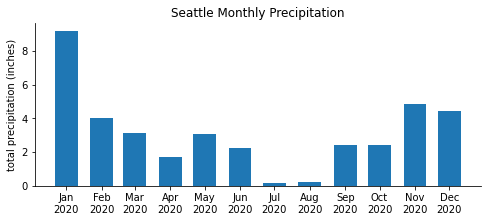

In [64]:
monthly_seattle_prcp = weather.query('city == "Seattle"').resample('1MS').PRCP.sum()

fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(monthly_seattle_prcp.index, monthly_seattle_prcp.to_numpy(), width=20)

ax.set(title='Seattle Monthly Precipitation', ylabel='total precipitation (inches)')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
despine(ax)

##### 2. Create a horizontal bar plot of total precipitation per city. Add a vertical line at Seattle's total precipitation.

<AxesSubplot:title={'center':'Total Precipitation per City in 2020'}, xlabel='2020 total precipitation (inches)'>

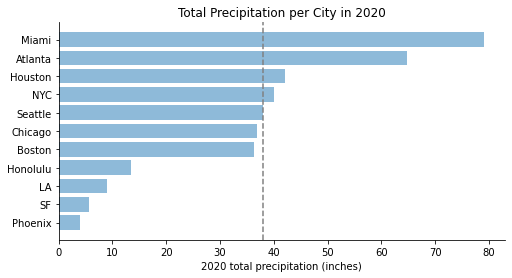

In [65]:
total_prcp = weather.groupby('city').PRCP.sum().sort_values()

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(total_prcp.index, total_prcp, alpha=0.5)

ax.set(
    xlabel='2020 total precipitation (inches)', 
    title='Total Precipitation per City in 2020'
)
ax.axvline(total_prcp['Seattle'], linestyle='--', color='gray')
despine(ax)

##### 3. Plot the daily average temperature (`TAVG`) for both LA and NYC. Fill in all sections where NYC's daily average temperature was higher than LA's in 2020.

In [66]:
def ex_3(data):
    la_tavg = data.query('city == "LA"').TAVG
    nyc_tavg = data.query('city == "NYC"').TAVG

    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(la_tavg.index, la_tavg, label='LA')
    ax.plot(nyc_tavg.index, nyc_tavg, label='NYC')

    ax.legend(title='city')
    ax.set(
        title='Average Daily Temperatures', ylabel=r'temperature ($^\circ$F)',
        xlim=(la_tavg.index.min(), None)
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    despine(ax)

    ax.fill_between(
        la_tavg.index, la_tavg, nyc_tavg, where=nyc_tavg > la_tavg, 
        hatch='///', color='gray', alpha=0.5
    )
    ax.annotate(
        'NYC Hotter than LA', xy=(dt.datetime(2020, 7, 25), 75),
        xytext=(dt.datetime(2020, 7, 25), 45), arrowprops=dict(arrowstyle='->'),
        ha='center'
    )
    return ax

<AxesSubplot:title={'center':'Average Daily Temperatures'}, ylabel='temperature ($^\\circ$F)'>

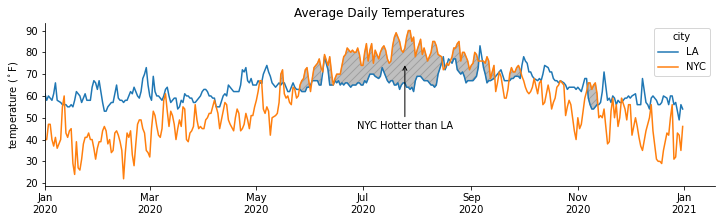

In [67]:
ex_3(weather)

##### 4. Generate histograms for the daily average wind (`AWND`) in each of the cities. Make sure to use subplots that share both the x- and y-axis.

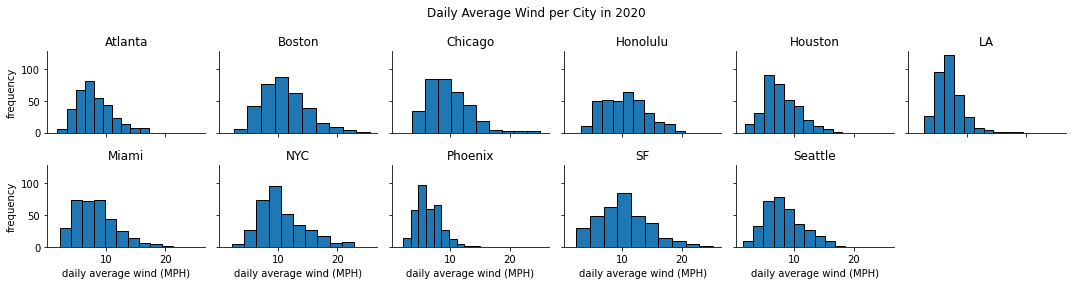

In [68]:
fig, axes = plt.subplots(2, 6, figsize=(15, 4), sharex=True, sharey=True)
for city, ax in zip(weather.city.unique(), axes.flatten()):
    ax.hist(weather.query(f'city == "{city}"').AWND, ec='black')
    ax.set_title(city)
    despine(ax)

for (i, j), ax in np.ndenumerate(axes):
    if i:
        ax.set_xlabel('daily average wind (MPH)')
    if not j:
        ax.set_ylabel('frequency')

axes[-1][-1].remove()
fig.suptitle('Daily Average Wind per City in 2020')
fig.tight_layout()

## Section 1 Complete 🎉

<img width="300" src="https://images.unsplash.com/photo-1588706885388-0c820af62141?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2071&q=80" alt="Two happy jumping lambs frolicking in a field">